In [21]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [22]:
df_CA = df[(df['job_country']=='Canada')].dropna(subset=['salary_year_avg'])


In [23]:
job_titles_top = df_CA['job_title_short'].value_counts().index[:6].to_list()

job_titles_top

['Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer',
 'Data Analyst']

In [24]:
!conda install seaborn -y

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [25]:
import seaborn as sns

In [26]:
df_CA_top6 = df_CA[df_CA['job_title_short'].isin(job_titles_top)]

/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_62970/2194069904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_CA_top6, x='salary_year_avg', y='job_title_short', palette='magma')


Text(0, 0.5, '')

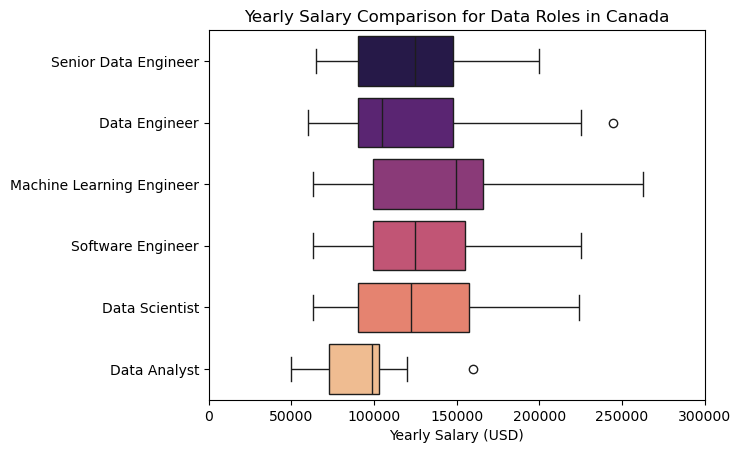

In [27]:
sns.boxplot(data=df_CA_top6, x='salary_year_avg', y='job_title_short', palette='magma')
plt.xlim(0, 300_000)
plt.title('Yearly Salary Comparison for Data Roles in Canada')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')


In [31]:
df_DA_CA = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Canada')]

df_DA_CA = df_DA_CA.dropna(subset=['salary_year_avg'])

In [33]:
df_DA_CA = df_DA_CA.explode('job_skills')

df_DA_CA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
48811,105000.0,sql
48811,105000.0,python
48811,105000.0,javascript
48811,105000.0,bigquery
48811,105000.0,tableau


In [71]:
plot_CA = df_DA_CA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False).head(6)

/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_62970/2622522609.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_CA, x='median', y='job_skills', palette='magma')


Text(0, 0.5, '')

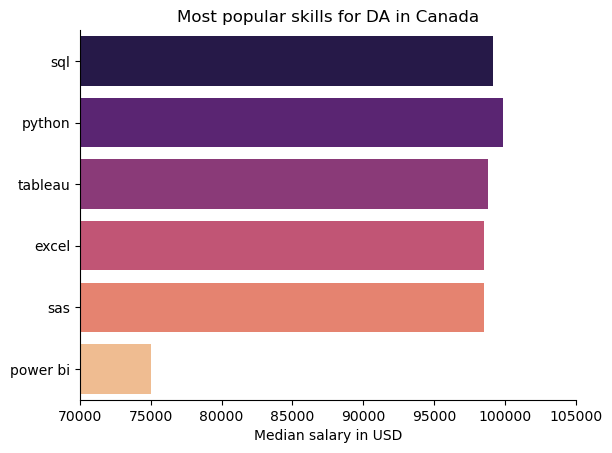

In [75]:
sns.barplot(data=plot_CA, x='median', y='job_skills', palette='magma')
plt.xlim(70_000, 105_000)
sns.despine()

plt.title('Most popular skills for DA in Canada')
plt.xlabel('Median salary in USD')
plt.ylabel('')


In [45]:
plot_CA

,count,median
job_skills,,
sql,17,99150.0
python,14,99825.0
tableau,10,98825.0
excel,9,98500.0
sas,8,98500.0
power bi,5,75000.0
